## 붓꽃 데이터 클러스터링

### 라이브러리 불러오기

In [23]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [8]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
KM = KMeans(n_clusters= 3
            , init = 'k-means++'
            , max_iter = 300
            , random_state=0       
            )

KM.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [15]:
KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [19]:
# target과 비교
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_result = iris_df.groupby(['target', 'cluster'])['sepal length (cm)'].count()
iris_result


target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64

In [22]:
# 차원을 줄여서 군집화
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

# 주성분1, 주성분2
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


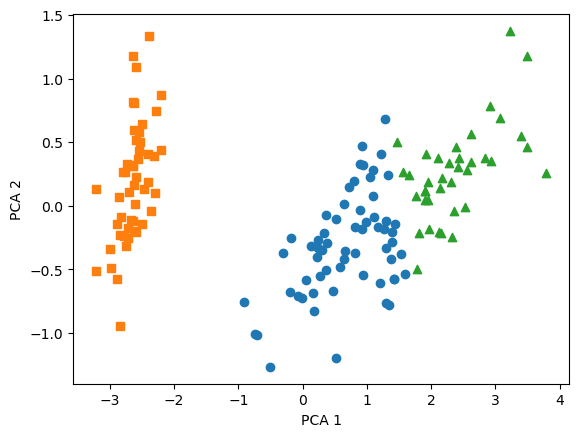

In [26]:
markers = ['o', 's', '^']
for idx, marker in enumerate(markers):
    plt.scatter(x=iris_df.loc[iris_df['cluster']==idx, 'pca_x'], y = iris_df.loc[iris_df['cluster']==idx, 'pca_y'], marker = marker)
plt.xlabel('PCA 1')   
plt.ylabel('PCA 2')
plt.show()


## 클러스터링을 위한 군집 데이터셋 생성

### 라이브러리 불러오기

In [38]:
from sklearn.datasets import make_blobs

import numpy as np

In [37]:
X, y = make_blobs(n_samples = 200
                  , n_features = 2
                  , centers = 3
                  , cluster_std = 0.8
                  , random_state = 0
                  )

cluster_df = pd.DataFrame(X, columns = ['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


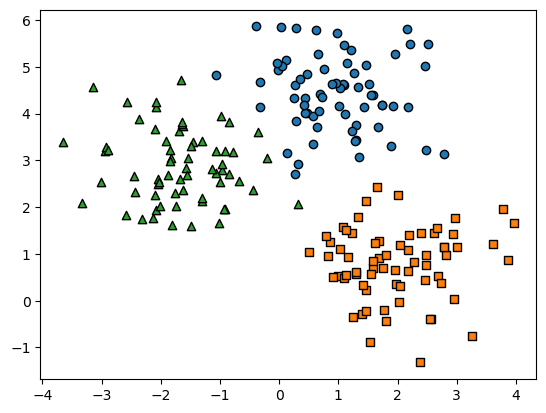

In [42]:
target_list = np.unique(y)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
    target_cluster = cluster_df[cluster_df['target']==target]
    plt.scatter(x=target_cluster['ftr1']
                , y = target_cluster['ftr2']
                , edgecolor = 'k'
                , marker=markers[target])



In [46]:
KM = KMeans(n_clusters= 3
            , init = 'k-means++'
            , max_iter = 200
            , random_state = 0
            )

cluster_labels = KM.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels
cluster_df.head()

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


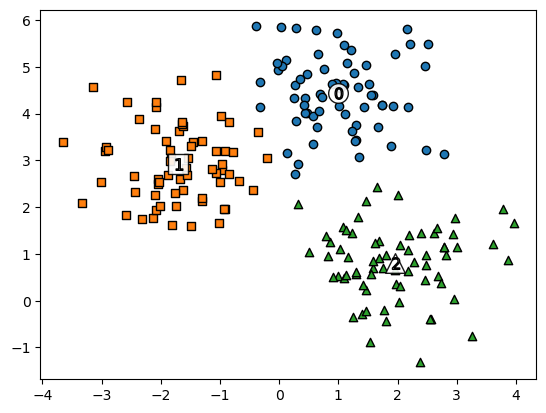

In [63]:
centers = KM.cluster_centers_

cluster_list = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for cluster in cluster_list:
    target_cluster = cluster_df[cluster_df['kmeans_label']==cluster]
    plt.scatter(x=target_cluster['ftr1']
                , y = target_cluster['ftr2']
                , edgecolor = 'k'
                , marker=markers[cluster])
    
    center_x_y = centers[cluster]
    plt.scatter(x = center_x_y[0]
                , y = center_x_y[1]
                , edgecolors='k'
                , color = 'white'
                , s = 200
                , alpha = 0.9
                , marker = markers[cluster])

    plt.scatter(x = center_x_y[0]
                , y = center_x_y[1]
                , edgecolors='k'
                , color = 'white'
                , s = 70
                , marker = '$%d$' % cluster)



In [65]:
cluster_df.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64

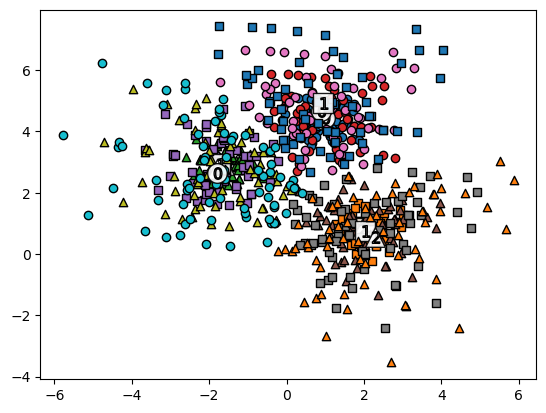

In [67]:
cluster_std_list = [0.4, 0.8, 1.2, 1.6]

for i in cluster_std_list:
    X, y = make_blobs(n_samples = 200
                    , n_features = 2
                    , centers = 3
                    , cluster_std = i
                    , random_state = 0
                    )

    cluster_df = pd.DataFrame(X, columns = ['ftr1', 'ftr2'])
    cluster_df['target'] = y

    cluster_labels = KM.fit_predict(X)
    cluster_df['kmeans_label'] = cluster_labels

    centers = KM.cluster_centers_

    cluster_list = np.unique(cluster_labels)

    markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

    for cluster in cluster_list:
        target_cluster = cluster_df[cluster_df['kmeans_label']==cluster]
        plt.scatter(x=target_cluster['ftr1']
                    , y = target_cluster['ftr2']
                    , edgecolor = 'k'
                    , marker=markers[cluster])
        
        center_x_y = centers[cluster]
        plt.scatter(x = center_x_y[0]
                    , y = center_x_y[1]
                    , edgecolors='k'
                    , color = 'white'
                    , s = 200
                    , alpha = 0.9
                    , marker = markers[cluster])

        plt.scatter(x = center_x_y[0]
                    , y = center_x_y[1]
                    , edgecolors='k'
                    , color = 'white'
                    , s = 70
                    , marker = '$%d$' % cluster)



## silhouette 계수 측정

### 라이브러리 불러오기

In [74]:
from sklearn.metrics import silhouette_score, silhouette_samples

score_sample = silhouette_samples(iris.data, iris_df['cluster'])

iris_df['silhouette_coeff'] = score_sample

average_score = silhouette_score(iris.data, iris_df['cluster'])

iris_df.head(3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0.852955
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,0.815495
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,0.829315


In [75]:
silhouette_score(iris.data, iris_df['cluster'])

0.5528190123564095

### silhouette chart

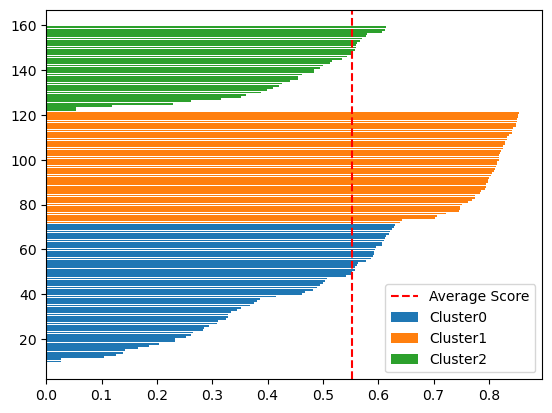

In [ ]:
y_lower = 10
for i in range(3):
    cluster_i = score_sample[iris_df['cluster'] == i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper)
             , cluster_i
             , edgecolor = 'none'
             , label = f'Cluster{i}'
             )

    y_lower = y_upper

avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score
            , color = 'red'
            , linestyle = '--'
            , label = 'Average Score'
            )

plt.legend()
plt.show()

c:\Users\YJ\.conda\envs\xgboost_env\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


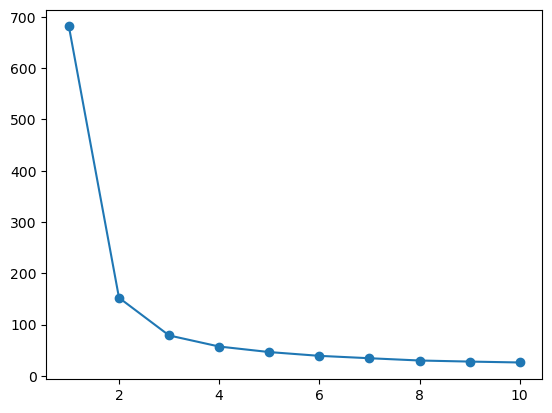

In [99]:
### screen plot
k_values = range(1, 11)

inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    
plt.plot(k_values, inertia_values, marker = 'o')


In [100]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

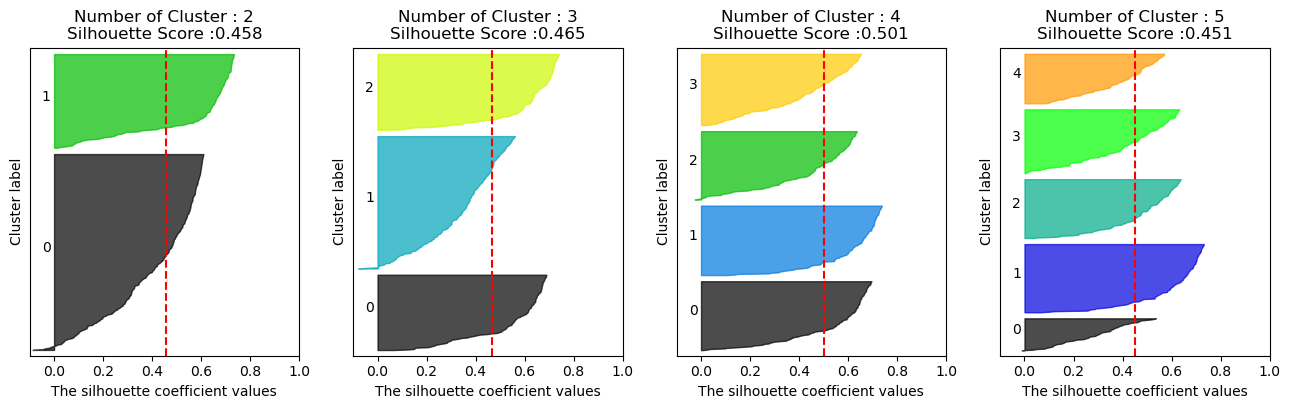

In [114]:
X, y = make_blobs(n_samples = 500
                  , n_features=2
                  , centers =4
                  , cluster_std = 1
                  , center_box = (-10.0, 10.0)
                  , shuffle=True
                  , random_state=0
                  )

visualize_silhouette([2,3,4,5], X)

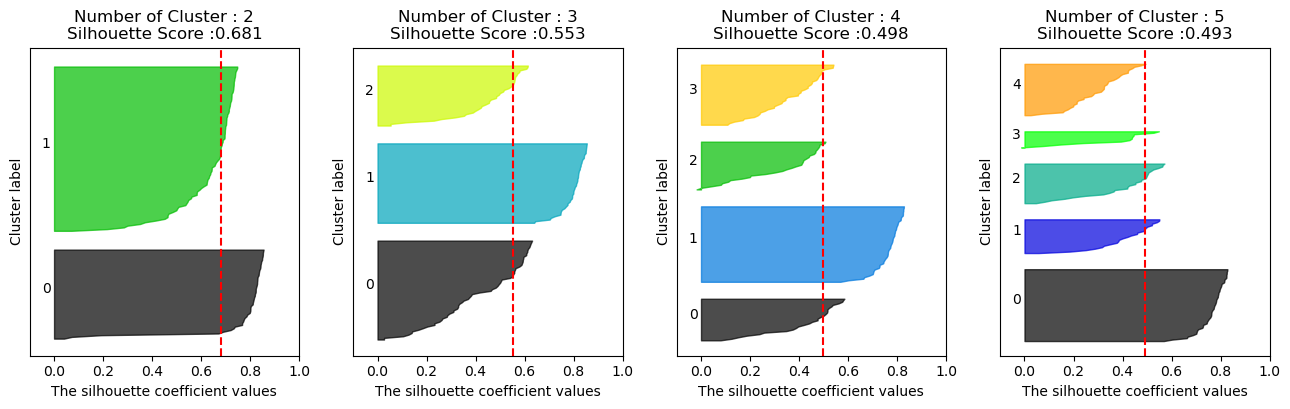

In [115]:
visualize_silhouette([2,3,4,5], iris.data)

### 마무리